# Project: TMDb-movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project, I will be analyzing The Movie Database(TMDb) which contains various aspects of movies ranging from the cast, director, the movie release date and year together with the budget and revenue of the associated movie. 

Of particular interest is the trend of various properties year on year and the factors influencing the revenue generated by a movie.


In [1]:
# Imported relevant packagaes and selected dataset for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

The dataset was loaded so as to check it for cleanliness and do the proper trimming and cleaning for analysis


### General Properties

In [21]:
# Loaded the data and viewed it
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Data is organized by the release year in from the most recent year of 2015.

Cast, Genre and Production companies columns have multiple data entry values seperated by |. 

The last two columns of Budget and Revenue have the suffix -adj added to it indicate the change in prices as adjusted for inflation over time as of the year 2010.



In [22]:
# Get the number of rows and columns
df.shape

(10866, 21)

The data has 10866 movies across 21 different categories.

In [5]:
# Get useful descriptive statistical info about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 The movie release year dates from 1960 to 2015 with the majority of the movies released in the 2000s
 
 The longest runtime of the movies released is 15 hours which suggests a movie series running over a couple of shows.

## Data Cleaning
### Reviewing the data structures

In [6]:
#  IdentifY the columns with null values and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Columns like that of the cast, director etc. contain null values which can indicate missing values or data that is unavailable at the time of collection.

Release date is represented as a string type instead of datetime.

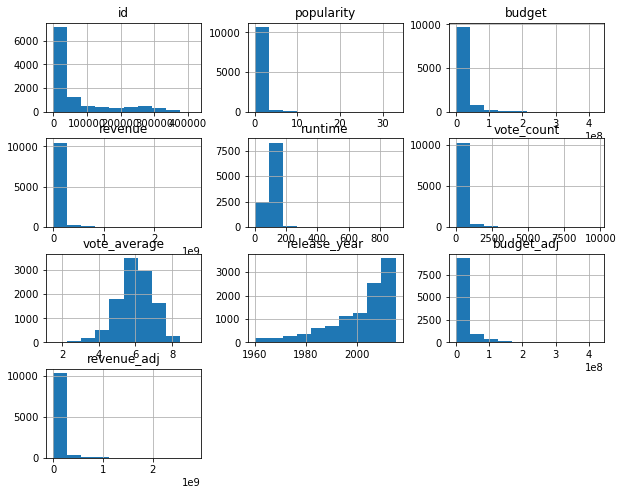

In [23]:
# Get a graphical distribution of the quantitative data
df.hist(figsize=(10,8));

The Histogram shows the distribution of non-null quantitative data. 

The Popularity, Budget, Revenue, Runtime, Vote count and adjusted budget and revenue values are all skewed to the right which shows a positive skew. Most observations are to the extreme left ends of the distribution with its tail on the right side.

In [8]:
# Get the count of the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

IMDb ID, Cast, Homepage, Director, Tagline, Keywords, Overview, Genres and Production Companies contain null values with Homepage containing the highest number of null values.


In [9]:
# Drop columns not required during analysis 
df.drop(columns=['id', 'imdb_id', 'cast', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,homepage,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- Columns containing null values were all dropped because they did not contain useful quantitative data for our analysis except homepage whose qualitative data is required for one of the research questions.
- Release date was retained to provide more information on dates when necessary.


In [24]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

 The release year data type is converted to datetime object instead of as a string. This makes any future manipulation that might be needed much easier. [ns]  represents the nano second-based time format for specification of precision of this object type.

 This loaded dataset was cleaned and thus required minimal data wrangling.

<a id='eda'></a>
## Exploratory Data Analysis

With a cleaned dataset, analysis can now be performed on it to answer the research questions at hand.



### 1. How have trends changed year to year for various movie properties?

In [19]:
# Get the average release year
def med_yr():
    print(df['release_year'].mean())
med_yr()

2001.3226578317688


 The year 2000 will be used to divide the analysis into two segments:
 
 a) The 20th century - the year 2000 and years before that
 
 b) The 21st century - years after the year 2000

In [25]:
earlier_yrs = df.query('release_year <= 2000')['revenue'].mean()
latter_yrs = df.query('release_year > 2000')['revenue'].mean()
earlier_yrs, latter_yrs

(33833646.75745223, 43210362.96671949)

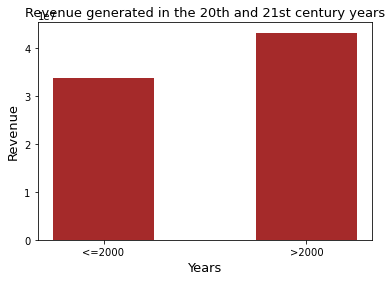

In [26]:
plt.bar(['<=2000', '>2000'], [earlier_yrs, latter_yrs], width = 0.50, color = 'brown')
plt.title('Revenue generated in the 20th and 21st century years', fontsize = 13)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Revenue', fontsize = 13);

The revenues generated in the 21st century was greater than that of the 20th century.

In [27]:
earlier_yrs = df.query('release_year <= 2000')['revenue_adj'].mean()
latter_yrs = df.query('release_year > 2000')['revenue_adj'].mean()
earlier_yrs, latter_yrs

(63522595.042494714, 44489120.52557742)

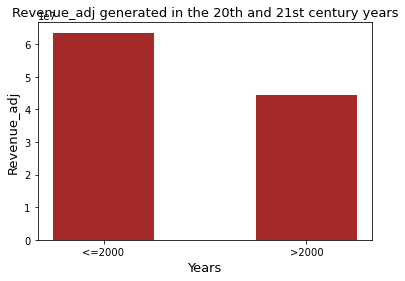

In [28]:
plt.bar(['<=2000', '>2000'], [earlier_yrs, latter_yrs], width = 0.50, color = 'brown')
plt.title('Revenue_adj generated in the 20th and 21st century years', fontsize = 13)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Revenue_adj', fontsize = 13);

After the revenues are adjusted for inflation, that earned in the 20th century increased incrementally while that earned in the 21st century remained relatively the same.

In [29]:
df.runtime.mean()

102.07086324314375

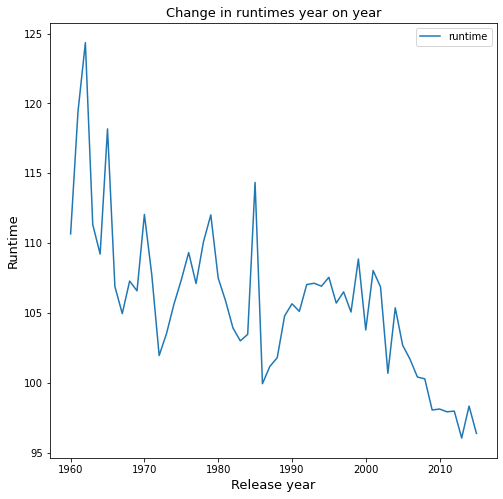

In [30]:
df.groupby('release_year').runtime.mean().plot(kind = 'line', figsize=(8, 8))
plt.title('Change in runtimes year on year', fontsize = 13)
plt.xlabel('Release year', fontsize = 13)
plt.ylabel('Runtime', fontsize = 13)
plt.legend();

 Over the course of the years, there has been a systematic decrease in the runtime for shows with the average movie running for 102 minutes ie. 1 hour 42 minutes

In [31]:
bw = df.query('release_year < 2000')['homepage'].count()
aw = df.query('release_year >= 2000')['homepage'].count()
bn = df.query('release_year < 2000')['homepage'].isnull().sum()
an = df.query('release_year >= 2000')['homepage'].isnull().sum()
bw, aw, bn, an

(206, 2730, 3492, 4438)

 Homepages are important for viewers who will not watch the movies in cinemas as they can alternatively watch it online from home.
 
 Knowing the number of movies that have homepages for their movies or lack is an important feature to observe year on year.

In [32]:
web = [bw, aw]
no_web = [bn, an]

In [33]:
n = 2
r = np.arange(n)
width = 0.35

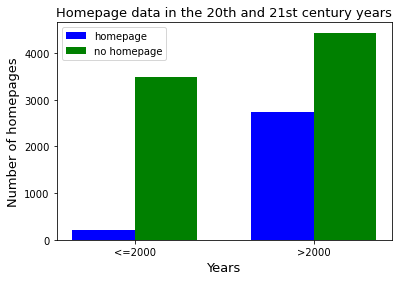

In [34]:
plt.bar(r, web, color = 'blue', width = width, label = 'homepage')
plt.bar(r + width, no_web, color = 'green', width = width, label = 'no homepage')
plt.xticks(r + width/2, ['<=2000', '>2000'])
plt.title('Homepage data in the 20th and 21st century years', fontsize = 13)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Number of homepages', fontsize = 13)
plt.legend()

plt.show();

Movies released in the 20th century had less homepages available compared to those released in the 21st century. There is still a disproportionately higher number of movies released in the 21st century without a homepage comparred to the 20th century.

###  2. Factors that influence movie revenue earnings as adjusted accordingly

In [35]:
# Get median value of popularity
df.popularity.median()

0.3838555

 This median value of the popularity score will be used to divide the analysis into two segments:
 
 a) Scores greater than 0.38 - Most popular scores
 
 b) Scores less than 0.38 - Least popular scores

In [36]:
most_pop = df.query('popularity >= 0.38')['revenue_adj'].mean()
least_pop = df.query('popularity < 6.38')['revenue_adj'].mean()
most_pop, least_pop

(95199456.69939563, 48673539.10188389)

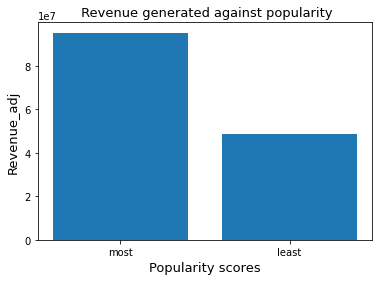

In [37]:
plt.bar(['most', 'least'], [most_pop, least_pop])
plt.title(' Revenue generated against popularity', fontsize = 13)
plt.xlabel('Popularity scores', fontsize = 13)
plt.ylabel('Revenue_adj', fontsize = 13)
plt.show();

The movies with higher popularity scores generated higher revenues. The lower popularity scoring movies generated less revenue.

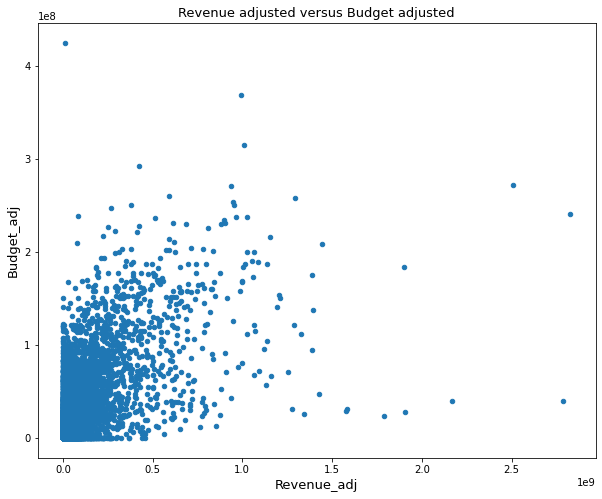

In [38]:
df.plot(x = 'revenue_adj', y = 'budget_adj', kind = 'scatter', figsize=(10, 8));
plt.title('Revenue adjusted versus Budget adjusted', fontsize = 13)
plt.xlabel('Revenue_adj', fontsize = 13)
plt.ylabel('Budget_adj', fontsize = 13)
plt.show();

There was a positive correlation between the budget assigned for a particular movie and the revenue generated by the movie. Although the data does contain a few outliers, the majority of the values are directly proportionational.

In [39]:
df.vote_average.describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

Getting descriptive statistics of the vote average helped to breakdown the data into various quartiles that will be used to create an additional column with vote average ranges called ratings.

In [40]:
bin_edges = [1.5, 5.4, 6.0, 6.6, 9.2]

In [41]:
bin_names = ['low', 'mod_low', 'mod_high', 'high']

 The minimum, 25th, 50th, 75th percentile and maximum vote average values were used to create the 4 levels of rating as: 
 
 a) Low  
 
 b) Moderately low 
 
 c) Moderately high
 
 d) High

In [42]:
df['ratings'] = pd.cut(df['vote_average'], bin_edges, labels = bin_names)

In [43]:
df.groupby('ratings').revenue_adj.mean()

ratings
low         1.567300e+07
mod_low     4.213616e+07
mod_high    6.364966e+07
high        8.786972e+07
Name: revenue_adj, dtype: float64

The average revenue generated by the movies was calculated per category and was seen to increase with a higher vote average.

In [44]:
x = bin_names
y = df.groupby('ratings').revenue_adj.mean()

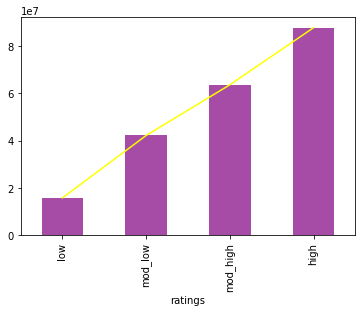

In [45]:
df.groupby('ratings').revenue_adj.mean().plot(kind = 'bar', color = 'purple', alpha = 0.7)
plt.plot(x, y, color = 'yellow')
plt.show()

The trend in movie ratings was clearly indicated by this combined bar and line chart that showed high movie ratings attracted higher revenues. 

An increasing positive increase was observed across the categories.

## Conclusions

- For the year on year analysis, a limitation is observed as the revenue_adj for the movies released during the 20th century grew because of inflation when in fact the value of the earnings generated should have decreased because of inflation eroding the future claims on money.

- Indeed, the 21st century saw an evolving era of technology that saw more production companies adapt to having websites for their movies for at-home online users.

- There was a strong correlation between movies that generated high revenues adjusted for inflation and the user reception of the movies. The movies which users rated highly seem to be those which are popular and hence are able to generate more money.

- TMDb accurately captured data that is consistent with the users' consumption of one of the biggest forms of everyday entertainment.